**1. 13강 연습문제 1번 문제에서 주어진 합성곱층을 Affine층으로 바꾸시오. 즉, 입력 노드, 출력 노드, 에지를 그리고 에지위에 가중치를 표시하고 가중치 행렬과 편향 벡터를 구하고 데이터를 나열하시오.**

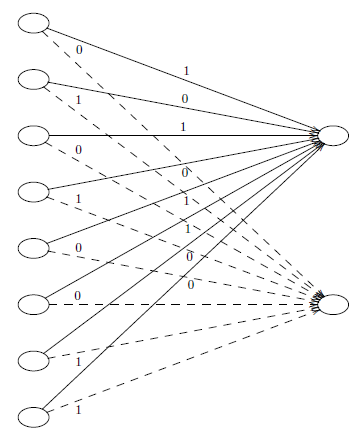

가중치 행렬 :
$$
\begin{pmatrix}
1&0\\
0&1\\
1&0\\
0&1\\
1&0\\
1&0\\
0&1\\
0&1
\end{pmatrix}
$$

편향 벡터 :
$$[1,2]$$

데이터 :
$$
\begin{aligned}
&[1,0,0,1,1,1,1,0], \\
&[0,1,1,0,1,1,0,1], \\
&[0,1,1,0,1,0,1,1], \\
&[1,0,0,1,0,1,1,1], \\
&[1,1,1,0,0,0,0,0], \\
&[1,1,0,0,0,1,0,1], \\
&[1,0,1,0,0,0,1,1], \\
&[0,0,0,0,0,1,1,1]
\end{aligned}
$$

**2. (i) 다음은 합성곱 클래스의 역전파 코드이다.
13강 연습문제 1번 문제에서 주어진 합성곱층으로  흘러 들어온 미분이
$$
{\partial L \over \partial Y}=
\begin{pmatrix}
\begin{pmatrix}
1&1 \\
1&1
\end{pmatrix}
&
\begin{pmatrix}
1&1 \\
1&1
\end{pmatrix} \\
\begin{pmatrix}
1&1 \\
1&1
\end{pmatrix}
&
\begin{pmatrix}
1&1 \\
1&1
\end{pmatrix}
\end{pmatrix}
$$
일 때, 밑줄친 6개의 값을 손으로 구하시오.**

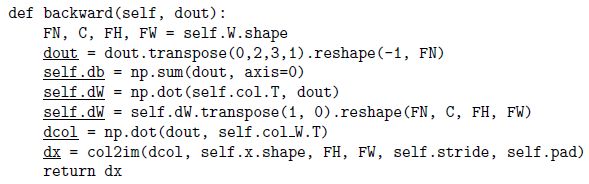

항이 모두 1이기 때문에 `transpose(0,2,3,1)`을 적용해도 그대로 입니다.  
필터 개수가 2이므로 8$\times$2 행렬로 reshape합니다.  
$$
dout =
\begin{pmatrix}
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1
\end{pmatrix}
$$

합성곱층의 역전파를 Affine층의 역전파를 이용해 구합니다.  
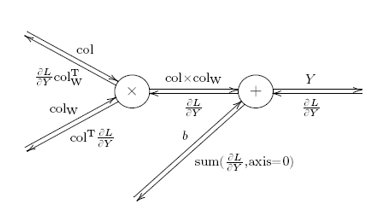
편향에 대한 미분은 흘러들어온 미분의 각 열을 더합니다.  
$$
db = [8,8]
$$
im2col한 데이터의 transpose에 흘러들어온 미분을 곱해서 가중치 행렬에 대한 미분을 구합니다.
$$
dW =
\begin{pmatrix}
1&0&0&1&1&1&1&0\\
0&1&1&0&1&1&0&1\\
0&1&1&0&1&0&1&1\\
1&0&0&1&0&1&1&1\\
1&1&1&0&0&0&0&0\\
1&1&0&0&0&1&0&1\\
1&0&1&0&0&0&1&1\\
0&0&0&0&0&1&1&1
\end{pmatrix}^T
\begin{pmatrix}
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1
\end{pmatrix}
=
\begin{pmatrix}
1&0&0&1&1&1&1&0\\
0&1&1&0&1&1&0&0\\
0&1&1&0&1&0&1&0\\
1&0&0&1&0&0&0&0\\
1&1&1&0&0&0&0&0\\
1&1&0&1&0&1&0&1\\
1&0&1&1&0&0&1&1\\
0&1&1&1&0&1&1&1
\end{pmatrix}
\begin{pmatrix}
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1
\end{pmatrix}
=
\begin{pmatrix}
5&5\\
4&4\\
4&4\\
2&2\\
3&3\\
5&5\\
5&5\\
6&6
\end{pmatrix}
$$
transpose를 취하면
$$
\begin{pmatrix}
5&4&4&2&3&5&5&6\\
5&4&4&2&3&5&5&6
\end{pmatrix}
$$
이고 (2,2,2,2)로 resahpe을 해 필터에 대한 미분을 얻습니다.
$$
dW =
\begin{pmatrix}
\begin{pmatrix}
5&4 \\
4&2
\end{pmatrix}
&
\begin{pmatrix}
3&5 \\
5&6
\end{pmatrix} \\
\begin{pmatrix}
5&4 \\
4&2
\end{pmatrix}
&
\begin{pmatrix}
3&5 \\
5&6
\end{pmatrix}
\end{pmatrix}
$$
흘러들어온 미분에 필터를 행렬화한 가중치 행렬의 transpsoe를 곱해 Affine층에 입력된 데이터에 대한 미분을 구합니다.
$$
dcol =
\begin{pmatrix}
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1\\
1&1
\end{pmatrix}
\begin{pmatrix}
1&0&1&0&1&1&0&0\\
0&1&0&1&0&0&1&1
\end{pmatrix}
=
\begin{pmatrix}
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1\\
1&1&1&1&1&1&1&1
\end{pmatrix}
$$
여기에 col2im을 적용해서 합성곱층에 입력된 데이터에 대한 미분을 구합니다.
하나의 데이터, 하나의 채널에 대해서는
$$
\begin{pmatrix}
1&1&0\\
1&1&0\\
0&0&0\\
\end{pmatrix}
+
\begin{pmatrix}
0&1&1\\
0&1&1\\
0&0&0\\
\end{pmatrix}
+
\begin{pmatrix}
0&0&0\\
1&1&0\\
1&1&0\\
\end{pmatrix}
+
\begin{pmatrix}
0&0&0\\
0&1&1\\
0&1&1
\end{pmatrix}
=
\begin{pmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{pmatrix}
$$
인데 다른 데이터와 채널도 동일합니다.
col2im을 해서 합성곱층에 입력된 데이터에 대한 미분을 얻습니다.
$$
dx=
\begin{pmatrix}
\begin{pmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{pmatrix}
&
\begin{pmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{pmatrix} \\
\begin{pmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{pmatrix}
&
\begin{pmatrix}
1&2&1\\
2&4&2\\
1&2&1
\end{pmatrix}
\end{pmatrix}
$$

**(ii) 코드로 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.util import im2col, col2im

stride=1
pad=0

x = np.array([[[[1,0,1],[0,1,0],[1,0,1]],[[1,1,1],[1,0,1],[1,1,1]]],[[[1,1,1],[1,0,0],[1,0,0]],[[0,0,1],[0,0,1],[1,1,1]]]])
w = np.array([[[[1,0],[1,0]],[[1,1],[0,0]]],[[[0,1],[0,1]],[[0,0],[1,1]]]])
b=np.array([1,2])

FN, C, FH, FW = w.shape
N, C, H, W = x.shape
out_h = 1 + int((H + 2*pad - FH) / stride)
out_w = 1 + int((W + 2*pad - FW) / stride)

col = im2col(x, FH, FW, stride, pad)
col_W = w.reshape(FN, -1).T

In [2]:
dout = np.ones((2,2,2,2))
dout = dout.transpose(0,2,3,1).reshape(-1,2)
print(dout)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [3]:
db = np.sum(dout, axis=0)
print(db)

[8. 8.]


In [4]:
dW = np.dot(col.T, dout)
print(dW)

[[5. 5.]
 [4. 4.]
 [4. 4.]
 [2. 2.]
 [3. 3.]
 [5. 5.]
 [5. 5.]
 [6. 6.]]


In [5]:
dW = dW.transpose(1, 0).reshape(FN, C, FH, FW)
print(dW)

[[[[5. 4.]
   [4. 2.]]

  [[3. 5.]
   [5. 6.]]]


 [[[5. 4.]
   [4. 2.]]

  [[3. 5.]
   [5. 6.]]]]


In [6]:
dcol = np.dot(dout, col_W.T)
print(dcol)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [7]:
dx = col2im(dcol, x.shape, FH, FW, stride, pad)
print(dx)

[[[[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]

  [[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]]


 [[[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]

  [[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]]]


**3. transpose(0,3,1,2)의 역전파를 구하시오.**

transpose(0,3,1,2)는 재배열일 뿐이므로 역전파는 역재배열로 주어집니다.  
transpose(0,3,1,2)는 ABCD를 ADBC로 변환합니다.  
역재배열은 ADBC를 다시 ABCD로 돌려 놓아야 하므로 transpose(0,2,3,1)이됩니다.  
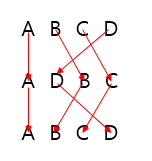